### Símbolos das equações

$P_{CP}$ - Pontos obtidos à carga paga carregada
\
$PV_{previsto}$ - Previsão de peso vázio
\
$PV_{real}$ - Previsão de peso vázio
\
$CP$ - Carg paga total [em kg]
\
$FPV$ - Fator de previsão de peso vazio
\
$FPR$ - Fator de pontuação de relatório
\
$NR$ - Nota total de relatório da equipe
\
$NR_{máx}$ - Nota máxima de relatório
\
$P_{Voo}$ - Pontuação de voo
\
$P_{AC}$ - Acuracidade de carga paga 
\
$CP_{Prevista}$ - Carga paga prevista [gráfico de carga paga]
\
$CP_{Real}$ - Carga paga real [obtida em voo]
\
$B_{PO}$ - Pontos obtidos como bonificação de parada de pista
\
$B_{RC}$ - Bonitificação pelo tempo de retirada de carga
\
$P_{B1}$ e $P_{B2}$ - Pontuação total de cada bateria 1 e 2 

In [1]:
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Alpha_MDO import *
import seaborn as sns


In [9]:
lot = loteria(50e6)
df = lot.gen_dados()
df.to_csv('espaco_amostral_grande.txt')

100%|██████████| 500000/500000 [00:40<00:00, 12350.62it/s]


In [2]:
#df.to_csv('espaco_amostral.txt')
#df = pd.read_csv('D:/UNESP/espaco_amostral.txt', index_col= False)

In [10]:
#df = df.drop(['NR_max', 'Unnamed: 0'], axis=1)

df['Desvio_CP'] = df['CP_prev']-df['CP_real']
df['Desvio_PV'] = df['PV_prev']-df['PV_real']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PV_prev     500000 non-null  float64
 1   PV_real     500000 non-null  float64
 2   CP_prev     500000 non-null  float64
 3   CP_real     500000 non-null  float64
 4   NR          500000 non-null  float64
 5   NR_max      500000 non-null  float64
 6   tempo       500000 non-null  float64
 7   resultados  500000 non-null  float64
 8   Desvio_CP   500000 non-null  float64
 9   Desvio_PV   500000 non-null  float64
dtypes: float64(10)
memory usage: 38.1 MB


In [11]:
df.sample(5) #head, tail

,PV_prev,PV_real,CP_prev,CP_real,NR,NR_max,tempo,resultados,Desvio_CP,Desvio_PV
330221,3.933943,3.023149,10.163125,9.070277,1.922444,185.0,7.938309,265.545933,1.092848,0.910794
164965,2.865457,1.174511,13.044893,5.229094,35.036966,185.0,40.845904,151.068401,7.815799,1.690946
102947,3.423808,3.263593,17.356010,12.060893,147.522402,185.0,28.883873,391.385316,5.295117,0.160215
188587,3.977741,2.182213,9.783484,17.884530,160.155811,185.0,119.217600,492.287818,-8.101046,1.795528
244960,3.446424,3.054109,10.012838,14.208548,171.605716,185.0,113.417605,428.760193,-4.195710,0.392314


In [6]:
df.iloc[df.idxmax()['resultados']]

PV_prev         1.280296
PV_real         1.173123
CP_prev        18.603455
CP_real        19.282870
NR            182.703949
NR_max        185.000000
tempo           9.393659
resultados    660.086271
Desvio_CP      -0.679415
Desvio_PV       0.107173
Name: 523, dtype: float64

In [7]:
df.corr()*100

,PV_prev,PV_real,CP_prev,CP_real,NR,NR_max,tempo,resultados,Desvio_CP,Desvio_PV
PV_prev,100.000000,-1.614931,3.400523,-2.676511,-1.990415,NaN,1.957707,-0.881810,4.255323,71.401019
PV_real,-1.614931,100.000000,-2.620310,-1.701063,-6.109646,NaN,3.876607,-1.071696,-0.645145,-71.157477
CP_prev,3.400523,-2.620310,100.000000,-1.985735,1.860180,NaN,-0.172618,0.463707,71.443261,4.224366
CP_real,-2.676511,-1.701063,-1.985735,100.000000,-0.065917,NaN,3.804053,97.157928,-71.375302,-0.689660
NR,-1.990415,-6.109646,1.860180,-0.065917,100.000000,NaN,0.506074,12.585929,1.349254,2.879468
NR_max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,1.957707,3.876607,-0.172618,3.804053,0.506074,NaN,100.000000,-1.196956,-2.783162,-1.338818
resultados,-0.881810,-1.071696,0.463707,97.157928,12.585929,NaN,-1.196956,100.000000,-67.670380,0.130781
Desvio_CP,4.255323,-0.645145,71.443261,-71.375302,1.349254,NaN,-2.783162,-67.670380,100.000000,3.441972
Desvio_PV,71.401019,-71.157477,4.224366,-0.689660,2.879468,NaN,-1.338818,0.130781,3.441972,100.000000


<AxesSubplot:>

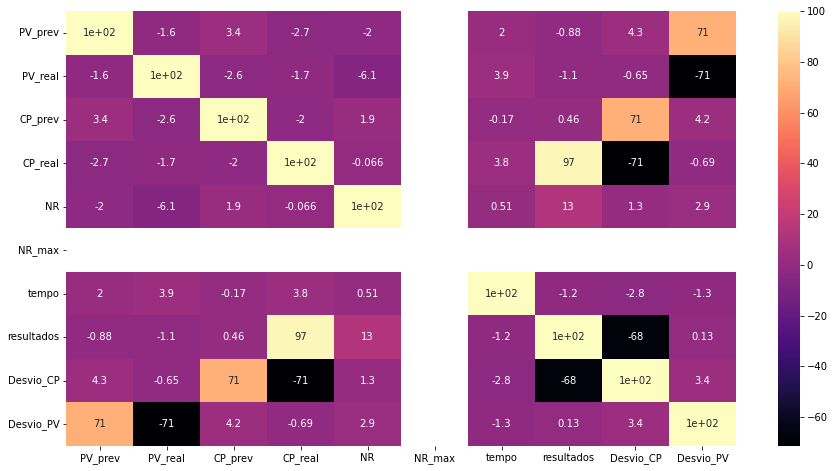

In [8]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(df.corr()*100, annot=True, cmap='magma')

#### Indice que corresponde o maior valor para cada parâmetro

In [8]:
#Encontrando os indices de maior valor
df.idxmax()

PV_prev       26223857
PV_real       40367849
CP_prev       49046202
CP_real        1125277
NR            22990627
NR_max               0
tempo          3494759
resultados    22577581
dtype: int64

#### Pontuações de cada parâmetro que obteve maior resultado

In [4]:
df.iloc[df.idxmax()['resultados']]

Unnamed: 0    2.257758e+07
PV_prev       2.633475e+00
PV_real       2.685324e+00
CP_prev       1.953796e+01
CP_real       1.992110e+01
NR            1.840167e+02
NR_max        1.850000e+02
tempo         1.624745e+00
resultados    7.201805e+02
Name: 22577581, dtype: float64

#### Filtrando os dados para otimizar os resultados

In [5]:
filtro_df = df[((df['CP_real'] <= 8) & (df['tempo'] >= 40) & (df['NR'] <= 120))] # &=and e |=or
filtro_df 

,Unnamed: 0,PV_prev,PV_real,CP_prev,CP_real,NR,NR_max,tempo,resultados
12,12,2.580952,1.699699,5.309648,6.670303,118.758417,185.0,68.785049,183.815605
19,19,1.715036,2.058247,19.819440,5.087404,6.738626,185.0,98.828978,141.353993
27,27,2.265598,3.715871,5.554708,6.447065,100.661703,185.0,70.771823,173.306016
31,31,1.653169,1.550125,15.643150,6.367543,59.196503,185.0,44.556481,196.066550
39,39,3.363092,3.181067,19.092958,7.192178,23.982924,185.0,116.458079,214.092501
...,...,...,...,...,...,...,...,...,...
49999944,49999944,3.656109,2.388747,9.896831,7.799514,66.580291,185.0,81.944561,205.088587
49999949,49999949,1.274126,2.098132,13.497534,5.158019,115.698875,185.0,44.152494,151.601117
49999958,49999958,1.419068,2.298309,5.264887,6.233052,112.776806,185.0,97.817806,171.357370
49999979,49999979,3.908291,1.373075,8.110589,7.960054,65.083137,185.0,110.936070,238.086612


In [6]:
filtro_df[filtro_df['resultados'] == max(filtro_df['resultados'])]

,Unnamed: 0,PV_prev,PV_real,CP_prev,CP_real,NR,NR_max,tempo,resultados
21106138,21106138,1.939904,1.934091,7.980834,7.956097,115.106122,185.0,45.434547,280.331766


In [31]:
filtro_df = df[((df['CP_real'] <= 10) & 
                (df['tempo'] >= 30) & 
                (df['NR'] <= 130) & 
                (df['resultados'] > 332))] # &=and e |=or
filtro_df 

,PV_prev,PV_real,CP_prev,CP_real,NR,NR_max,tempo,resultados
60961,2.666006,2.607996,9.983352,9.840668,129.811811,185.0,87.173176,336.699260
132231,2.419704,2.497704,10.055470,9.773970,125.831899,185.0,50.679220,333.008788
245946,3.729019,3.882751,9.533228,9.791263,126.145086,185.0,32.474234,338.505902
468122,3.732900,3.769028,9.428750,9.810877,128.295876,185.0,85.305020,333.083732
1264552,2.535793,2.476426,9.438837,9.953348,128.999382,185.0,38.736574,341.736806
...,...,...,...,...,...,...,...,...
48618209,2.127267,2.122762,9.385731,9.471546,127.240310,185.0,35.301676,333.816756
48677120,1.111799,1.096287,10.499417,9.917975,126.889608,185.0,52.887382,335.195007
49775496,2.804651,2.877453,9.868591,9.817242,127.816065,185.0,68.679034,334.699024
49826674,3.825521,3.942152,9.592490,9.692471,125.786929,185.0,44.517932,334.235967


#### Encontrando o melhor valor pra 'resultados' dentro os dados filtrados

In [32]:
filtro_df[filtro_df['resultados'] == max(filtro_df['resultados'])]

,PV_prev,PV_real,CP_prev,CP_real,NR,NR_max,tempo,resultados
45416185,1.347453,1.325434,10.264977,9.996786,124.49134,185.0,33.295454,346.072912


### Insights interessantes sobre a pontuação

In [4]:
filtro_df = df[((df['PV_real'] >= 3) &
                (df['CP_real'] <= 12) & 
                (df['tempo'] >= 10) & 
                (df['NR'] <= 120) & 
                (df['resultados'] > 390))] # &=and e |=or
filtro_df
#filtro_df[filtro_df['resultados'] == max(filtro_df['resultados'])]

,Unnamed: 0,PV_prev,PV_real,CP_prev,CP_real,NR,NR_max,tempo,resultados
114129,114129,3.763041,3.735186,11.485120,11.982263,106.772269,185.0,12.648686,394.085772
318844,318844,3.409068,3.405285,11.452701,11.903478,82.419224,185.0,10.034418,390.235364
889915,889915,3.673191,3.682808,12.087174,11.995070,57.743473,185.0,14.199984,394.053692
1152627,1152627,3.892276,3.908020,11.321821,11.633854,115.874192,185.0,13.002597,393.458282
1896597,1896597,3.650865,3.527595,12.052515,11.985354,26.505591,185.0,13.762617,391.439966
...,...,...,...,...,...,...,...,...,...
43956586,43956586,3.783555,3.722100,11.815530,11.892642,6.984293,185.0,13.233977,391.046535
44207442,44207442,3.359393,3.258387,11.968210,11.969097,119.052660,185.0,49.544645,392.649446
44454587,44454587,3.805187,3.799138,11.940831,11.906836,115.985680,185.0,21.980157,399.783355
46341908,46341908,3.869498,3.927464,11.684444,11.915275,94.700135,185.0,15.344485,390.307676


#### Verificando burri-convergencia do algoritmo

In [31]:
def burrice(max_it=10000):
    lot = loteria(max_it)
    df2 = lot.gen_dados(False)
    return df2.iloc[df.idxmax()['resultados']]['resultados'] 

max_it = 100
burros_resultados = np.empty((max_it))
for i in tqdm(range(max_it)): 
    burros_resultados[i] = (burrice(max_it))

#burros_resultados

100%|██████████| 100/100 [00:01<00:00, 93.13it/s]


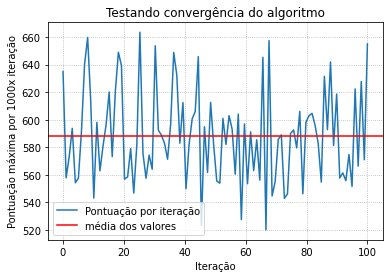

In [32]:
import matplotlib.pyplot as plt

x = np.linspace(0, max_it, max_it)

fig, ax = plt.subplots()
ax.set(title='Testando convergência do algoritmo', xlabel='Iteração', ylabel='Pontuação máxima por 1000x iteração')
ax.plot(x, burros_resultados, label='Pontuação por iteração')
ax.axhline(sum(burros_resultados)/max_it, label = 'média dos valores', color = 'r')
ax.legend()
#ax.set_ylim(300, 170)
ax.grid(linestyle = 'dotted')

Até que "converge" pra um valor legal 

In [33]:
fig.savefig('D:/conv.pdf')

In [29]:

import numpy as np

def filtragem(m, lim_min=0.35, lim_max=0.5):
    k = np.ravel(m)
    z = list();b = list()

    for n in range(len(k)):
        if lim_min <= k[n] <=lim_max:
            z.append(k[n])
            b.append(n)
    
    return z, b

x = np.array([[0.5, 3, 4, 3], 
              [2, 5, 6, 2], 
              [0.4, 1, 3, 4],
              [4, 5, 6, 5]])

valor, pos = filtragem(x)

[0.5, 0.4]
